Importing Dependencies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Data Collection


In [2]:
Data = pd.read_csv('/content/train.csv')

In [3]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Get Number of Rows and Columns
Data.shape

(891, 12)

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Get number of missing NAN in each column
Data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Handling the Missing Values

In [8]:
Data.drop(columns='Cabin', axis=1,inplace=True)



In [9]:
#replcae the missig values in 'Age' column with mean value
Data['Age'].fillna(Data['Age'].mean(),inplace=True)

<ipython-input-9-9ec1e5f0707f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Age'].fillna(Data['Age'].mean(),inplace=True)


In [10]:
print(Data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [11]:
print(Data['Embarked'].mode()[0])

S


In [12]:
#replacing the missing values in "Embarked" column with mode value
Data['Embarked'].fillna(Data['Embarked'].mode()[0],inplace=True)

<ipython-input-12-a3b7c12ddfe3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Embarked'].fillna(Data['Embarked'].mode()[0],inplace=True)


In [16]:
Data.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [17]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Data Analysis


In [18]:
#statistical measures
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
#Finding the number of survivors and victims on the titanic
Data['Survived'].value_counts()

# 0 is for Victims
# 1 is for Survivors

,count
Survived,
0,549
1,342


Data Visualization

In [20]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

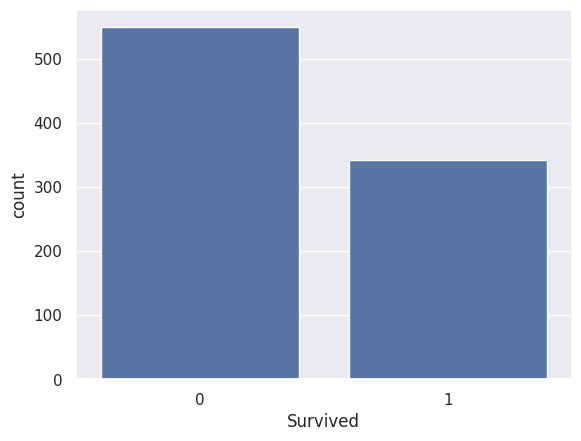

In [23]:
#making a count plot for "Survived" column
sns.countplot(x='Survived',data=Data)

In [24]:
#Finding the number of survivors and victims on the titanic
Data['Sex'].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex', ylabel='count'>

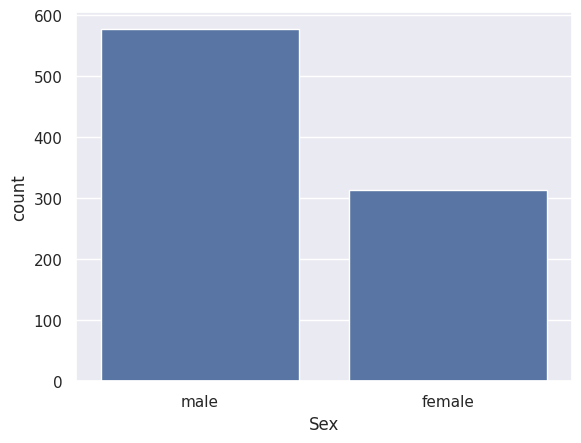

In [28]:
#making a count plot for "Sex" column
sns.countplot(x='Sex',data=Data)

<Axes: xlabel='Sex', ylabel='count'>

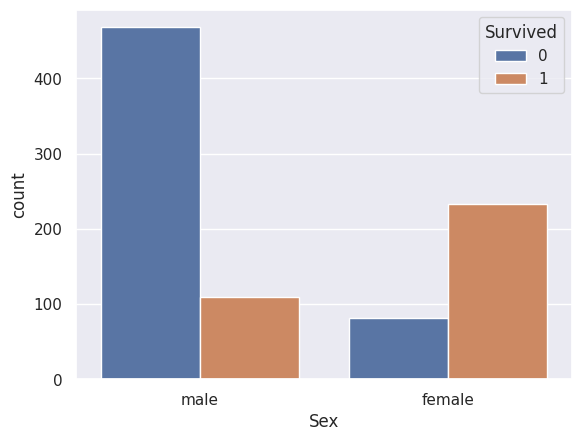

In [33]:
#Number of survivors gender wise
sns.countplot(x='Sex',hue='Survived',data=Data)

<ipython-input-38-0e7f3975f611>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=Data, palette='Set1')


<Axes: xlabel='Pclass', ylabel='count'>

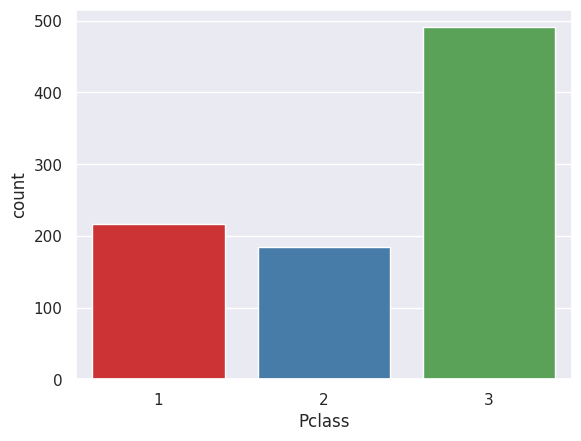

In [38]:
#making a count plot for "Pclass" column with different colors
sns.countplot(x='Pclass', data=Data, palette='Set1')

<Axes: xlabel='Pclass', ylabel='count'>

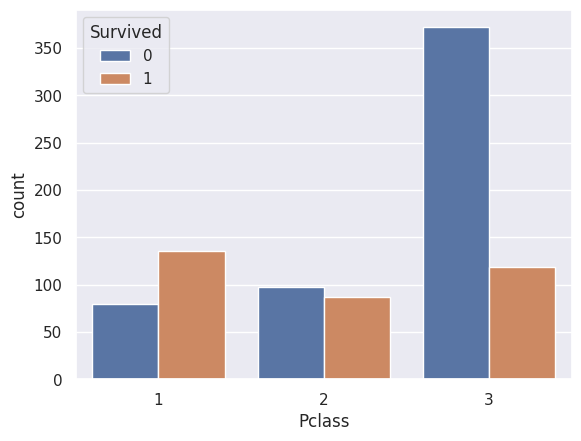

In [39]:
#Number of survivors ticket class wise
sns.countplot(x='Pclass',hue='Survived',data=Data)

Encoding the categorical columns

In [40]:
Data['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [41]:
Data['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [42]:
#Converting categorical columns

Data.replace({'Sex':{'male':0,'female':0}},inplace = True)
Data.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace= True)

<ipython-input-42-3078657c480a>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data.replace({'Sex':{'male':0,'female':0}},inplace = True)
<ipython-input-42-3078657c480a>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace= True)


In [43]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Separating Features and Traget

In [45]:
X = Data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y = Data['Survived']

In [47]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    0  38.000000      1      0  71.2833         1
2         3    0  26.000000      0      0   7.9250         0
3         1    0  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    0  19.000000      0      0  30.0000         0
888       3    0  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [48]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Splitting the data into Training data and Test data

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [50]:
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


Model Training

1.Logistic Regression

In [51]:
model = LogisticRegression()

In [52]:
#traning the logistic regression
model.fit(X_train,Y_train)

LogisticRegression()

Model Evaluation

Accuracy score

In [53]:
#accuarcy on training data
X_train_prediction = model.predict(X_train)


In [54]:
print(X_train_prediction)

[1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0
 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 1 0 

In [56]:
trained_data_acc = accuracy_score(Y_train,X_train_prediction)
print(f'Accuracy score of trained data :{trained_data_acc}')

Accuracy score of trained data :0.726123595505618


In [58]:
X_test_prediction = model.predict(X_test)
test_data_acc = accuracy_score(Y_test,X_test_prediction)
print(f'Accuracy score of test data :{test_data_acc}')

Accuracy score of test data :0.6871508379888268


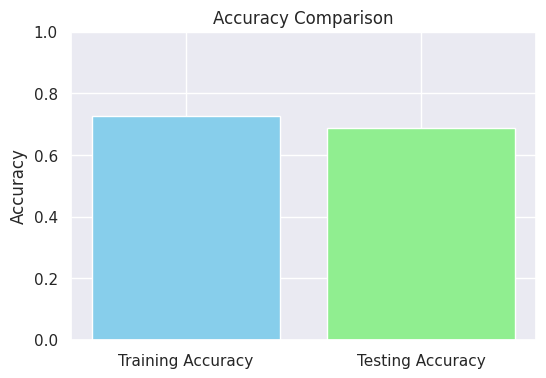

In [59]:
plt.figure(figsize=(6,4))
plt.bar(['Training Accuracy','Testing Accuracy'],[trained_data_acc,test_data_acc],color=['skyblue','lightgreen'])
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()